In [33]:
import os
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")
%matplotlib inline

from tqdm import tqdm_notebook, tnrange
from itertools import chain
from skimage.io import imread, imshow, concatenate_images
from skimage.transform import resize
from skimage.morphology import label
from sklearn.model_selection import train_test_split

from sklearn.model_selection import KFold

import tensorflow as tf

import keras

from keras.models import Model, load_model
from keras.layers import Input, BatchNormalization, Activation, Dense, Dropout
from keras.layers import Lambda, RepeatVector, Reshape
from keras.layers import Conv2D, Conv2DTranspose
from keras.layers import MaxPooling2D, GlobalMaxPool2D
from tensorflow.keras.layers import concatenate, add
# from keras.layers.merge import concatenate, add
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.optimizers import Adam
from tensorflow.keras.utils import img_to_array, img_to_array, load_img
# from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.preprocessing.image import ImageDataGenerator

In [2]:
import cv2
import PIL
import plotly.express as px
import seaborn as sns
import glob
import random
import sys

In [3]:
from os import listdir

In [4]:
from PIL import Image

In [5]:
absolute_path = os.path.dirname(os.path.realpath('__file__'))
relative_path = "Kaggel_dataset/csv/mass_case_description_test_set.csv"
full_path = os.path.join(absolute_path, relative_path)
# full_path = "../Kaggel_dataset/mass_case_description_train_set.csv"
csv_mass_test = pd.read_csv(full_path)

In [6]:
absolute_path = os.path.dirname(os.path.realpath('__file__'))
relative_path = "Kaggel_dataset/csv/mass_case_description_train_set.csv"
full_path = os.path.join(absolute_path, relative_path)
# full_path = "../Kaggel_dataset/mass_case_description_train_set.csv"
csv_mass = pd.read_csv(full_path)

In [7]:
full_mammo_images_paths_test = csv_mass_test["image file path"]

In [8]:
full_mammo_images_paths = csv_mass["image file path"]

In [9]:
roi_images_paths = csv_mass["ROI mask file path"]

In [ ]:
# absolute_path = os.path.dirname(os.path.realpath('__file__'))
# relative_path = "Kaggel_dataset/jpeg"

# image_dir = os.path.join(absolute_path, relative_path)
# image_dir

In [10]:
absolute_path = os.path.dirname(os.path.realpath('__file__'))
relative_path = "Kaggel_dataset/jpeg"

image_dir = os.path.join(absolute_path, relative_path)
image_dir

'/Users/gryffindorgirl/Desktop/Internship/Kaggel_dataset/jpeg'

In [11]:
def changeFolderPath(x):
    res = [i for i in range(len(x)) if x.startswith("/", i)]
    idx = res[1]
    folderPath = x[0:idx]
    x = x.replace(folderPath, image_dir)
    return x

In [12]:
full_mammo_images_paths_test = full_mammo_images_paths_test.apply(changeFolderPath)
full_mammo_images_paths_test.head()

0    /Users/gryffindorgirl/Desktop/Internship/Kagge...
1    /Users/gryffindorgirl/Desktop/Internship/Kagge...
2    /Users/gryffindorgirl/Desktop/Internship/Kagge...
3    /Users/gryffindorgirl/Desktop/Internship/Kagge...
4    /Users/gryffindorgirl/Desktop/Internship/Kagge...
Name: image file path, dtype: object

In [13]:
full_mammo_images_paths = full_mammo_images_paths.apply(changeFolderPath)
full_mammo_images_paths.head()

0    /Users/gryffindorgirl/Desktop/Internship/Kagge...
1    /Users/gryffindorgirl/Desktop/Internship/Kagge...
2    /Users/gryffindorgirl/Desktop/Internship/Kagge...
3    /Users/gryffindorgirl/Desktop/Internship/Kagge...
4    /Users/gryffindorgirl/Desktop/Internship/Kagge...
Name: image file path, dtype: object

In [14]:
roi_images_paths = roi_images_paths.apply(changeFolderPath)
roi_images_paths.head()

0    /Users/gryffindorgirl/Desktop/Internship/Kagge...
1    /Users/gryffindorgirl/Desktop/Internship/Kagge...
2    /Users/gryffindorgirl/Desktop/Internship/Kagge...
3    /Users/gryffindorgirl/Desktop/Internship/Kagge...
4    /Users/gryffindorgirl/Desktop/Internship/Kagge...
Name: ROI mask file path, dtype: object

In [15]:
def changeFilePath(x):
    res = [i for i in range(len(x)) if x.startswith("/", i)]
    idx_start = res[7]+1
    fileName = x[idx_start:]
    x = x.replace(fileName, 'full__pre__res.jpg')
    return x

In [16]:
def changeFilePath2(x):
    res = [i for i in range(len(x)) if x.startswith("/", i)]
    idx_start = res[7]+1
    fileName = x[idx_start:]
    x = x.replace(fileName, 'roi__pre__res.jpg')
    return x

In [17]:
full_mammo_images_paths_test = full_mammo_images_paths_test.apply(changeFilePath)
full_mammo_images_paths_test.head()

0    /Users/gryffindorgirl/Desktop/Internship/Kagge...
1    /Users/gryffindorgirl/Desktop/Internship/Kagge...
2    /Users/gryffindorgirl/Desktop/Internship/Kagge...
3    /Users/gryffindorgirl/Desktop/Internship/Kagge...
4    /Users/gryffindorgirl/Desktop/Internship/Kagge...
Name: image file path, dtype: object

In [18]:
full_mammo_images_paths = full_mammo_images_paths.apply(changeFilePath)
full_mammo_images_paths.head()

0    /Users/gryffindorgirl/Desktop/Internship/Kagge...
1    /Users/gryffindorgirl/Desktop/Internship/Kagge...
2    /Users/gryffindorgirl/Desktop/Internship/Kagge...
3    /Users/gryffindorgirl/Desktop/Internship/Kagge...
4    /Users/gryffindorgirl/Desktop/Internship/Kagge...
Name: image file path, dtype: object

In [19]:
roi_images_paths = roi_images_paths.apply(changeFilePath2)
roi_images_paths.head()

0    /Users/gryffindorgirl/Desktop/Internship/Kagge...
1    /Users/gryffindorgirl/Desktop/Internship/Kagge...
2    /Users/gryffindorgirl/Desktop/Internship/Kagge...
3    /Users/gryffindorgirl/Desktop/Internship/Kagge...
4    /Users/gryffindorgirl/Desktop/Internship/Kagge...
Name: ROI mask file path, dtype: object

In [20]:
def read_images_from_paths(file_paths):
    images = []
    for path in file_paths:
        try:
            img = Image.open(path)
            images.append(np.array(img))  # Convert the image to a numpy array and append to the list
        except Exception as e:
            print(f"Error loading image from '{path}': {e}")
    return images

In [21]:
array_of_images_test = read_images_from_paths(full_mammo_images_paths_test)

In [22]:
array_of_images = read_images_from_paths(full_mammo_images_paths)

In [23]:
len(array_of_images)

1318

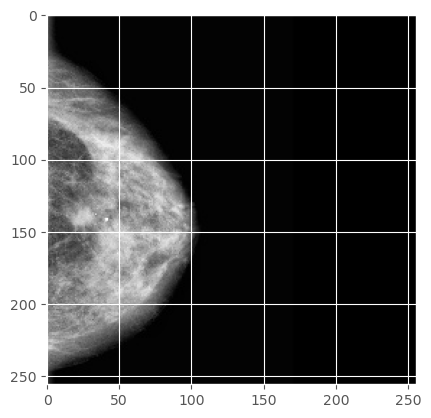

In [19]:
plt.imshow(array_of_images[0], cmap='gray')

In [24]:
array_of_roi = read_images_from_paths(roi_images_paths)

In [25]:
array_of_roi[0].shape

(256, 256)

In [26]:
len(array_of_roi)

1318

In [27]:
# Set some parameters
im_width = 256
im_height = 256
border = 5

In [28]:
def conv2d_block(input_tensor, n_filters, kernel_size = 3, batchnorm = True):
    """Function to add 2 convolutional layers with the parameters passed to it"""
    # first layer
    x = Conv2D(filters = n_filters, kernel_size = (kernel_size, kernel_size),\
              kernel_initializer = 'he_normal', padding = 'same')(input_tensor)
    if batchnorm:
        x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
    # second layer
    x = Conv2D(filters = n_filters, kernel_size = (kernel_size, kernel_size),\
              kernel_initializer = 'he_normal', padding = 'same')(input_tensor)
    if batchnorm:
        x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
    return x

In [29]:
def get_unet(input_img, n_filters = 16, dropout = 0.1, batchnorm = True):
    """Function to define the UNET Model"""
    # Contracting Path
    c1 = conv2d_block(input_img, n_filters * 1, kernel_size = 3, batchnorm = batchnorm)
    p1 = MaxPooling2D((2, 2))(c1)
    p1 = Dropout(dropout)(p1)
    
    c2 = conv2d_block(p1, n_filters * 2, kernel_size = 3, batchnorm = batchnorm)
    p2 = MaxPooling2D((2, 2))(c2)
    p2 = Dropout(dropout)(p2)
    
    c3 = conv2d_block(p2, n_filters * 4, kernel_size = 3, batchnorm = batchnorm)
    p3 = MaxPooling2D((2, 2))(c3)
    p3 = Dropout(dropout)(p3)
    
    c4 = conv2d_block(p3, n_filters * 8, kernel_size = 3, batchnorm = batchnorm)
    p4 = MaxPooling2D((2, 2))(c4)
    p4 = Dropout(dropout)(p4)
    
    c5 = conv2d_block(p4, n_filters = n_filters * 16, kernel_size = 3, batchnorm = batchnorm)
    
    # Expansive Path
    u6 = Conv2DTranspose(n_filters * 8, (3, 3), strides = (2, 2), padding = 'same')(c5)
    u6 = concatenate([u6, c4])
    u6 = Dropout(dropout)(u6)
    c6 = conv2d_block(u6, n_filters * 8, kernel_size = 3, batchnorm = batchnorm)
    
    u7 = Conv2DTranspose(n_filters * 4, (3, 3), strides = (2, 2), padding = 'same')(c6)
    u7 = concatenate([u7, c3])
    u7 = Dropout(dropout)(u7)
    c7 = conv2d_block(u7, n_filters * 4, kernel_size = 3, batchnorm = batchnorm)
    
    u8 = Conv2DTranspose(n_filters * 2, (3, 3), strides = (2, 2), padding = 'same')(c7)
    u8 = concatenate([u8, c2])
    u8 = Dropout(dropout)(u8)
    c8 = conv2d_block(u8, n_filters * 2, kernel_size = 3, batchnorm = batchnorm)
    
    u9 = Conv2DTranspose(n_filters * 1, (3, 3), strides = (2, 2), padding = 'same')(c8)
    u9 = concatenate([u9, c1])
    u9 = Dropout(dropout)(u9)
    c9 = conv2d_block(u9, n_filters * 1, kernel_size = 3, batchnorm = batchnorm)
    
    outputs = Conv2D(1, (1, 1), activation='sigmoid')(c9)
    model = Model(inputs=[input_img], outputs=[outputs])
    return model

In [30]:
def compute_iou(y_true, y_pred):
    
    intersection = (y_true * y_pred).sum()
    union = y_true.sum() + y_pred.sum() - intersection
    x = (intersection + 1e-15) / (union + 1e-15)
    x = x.astype(np.float32)
    
    return x

In [34]:
input_img = Input((im_height, im_width, 1), name='img')
model = get_unet(input_img, n_filters=16, dropout=0.05, batchnorm=True)
model.compile(optimizer=Adam(), loss="binary_crossentropy", metrics=["accuracy"])

Metal device set to: Apple M1


In [35]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 img (InputLayer)            [(None, 256, 256, 1)]        0         []                            
                                                                                                  
 conv2d_1 (Conv2D)           (None, 256, 256, 16)         160       ['img[0][0]']                 
                                                                                                  
 batch_normalization_1 (Bat  (None, 256, 256, 16)         64        ['conv2d_1[0][0]']            
 chNormalization)                                                                                 
                                                                                                  
 activation_1 (Activation)   (None, 256, 256, 16)         0         ['batch_normalization_1[0]

                                                                                                  
 concatenate_1 (Concatenate  (None, 64, 64, 128)          0         ['conv2d_transpose_1[0][0]',  
 )                                                                   'activation_5[0][0]']        
                                                                                                  
 dropout_5 (Dropout)         (None, 64, 64, 128)          0         ['concatenate_1[0][0]']       
                                                                                                  
 conv2d_13 (Conv2D)          (None, 64, 64, 64)           73792     ['dropout_5[0][0]']           
                                                                                                  
 batch_normalization_13 (Ba  (None, 64, 64, 64)           256       ['conv2d_13[0][0]']           
 tchNormalization)                                                                                
          

In [29]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


In [30]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [36]:
input_img = Input((im_height, im_width, 1), name='img')
model = get_unet(input_img, n_filters=16, dropout=0.05, batchnorm=True)
model.compile(optimizer=Adam(), loss="binary_crossentropy", metrics=["accuracy"])

In [37]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 img (InputLayer)            [(None, 256, 256, 1)]        0         []                            
                                                                                                  
 conv2d_20 (Conv2D)          (None, 256, 256, 16)         160       ['img[0][0]']                 
                                                                                                  
 batch_normalization_19 (Ba  (None, 256, 256, 16)         64        ['conv2d_20[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_19 (Activation)  (None, 256, 256, 16)         0         ['batch_normalization_19

                                                                                                  
 concatenate_5 (Concatenate  (None, 64, 64, 128)          0         ['conv2d_transpose_5[0][0]',  
 )                                                                   'activation_23[0][0]']       
                                                                                                  
 dropout_13 (Dropout)        (None, 64, 64, 128)          0         ['concatenate_5[0][0]']       
                                                                                                  
 conv2d_32 (Conv2D)          (None, 64, 64, 64)           73792     ['dropout_13[0][0]']          
                                                                                                  
 batch_normalization_31 (Ba  (None, 64, 64, 64)           256       ['conv2d_32[0][0]']           
 tchNormalization)                                                                                
          

In [33]:
callbacks = [
    EarlyStopping(patience=10, verbose=1),
    ReduceLROnPlateau(factor=0.1, patience=5, min_lr=0.00001, verbose=1),
    ModelCheckpoint('model-tgs-salt.h5', verbose=1, save_best_only=True, save_weights_only=True)
]

In [38]:
train_labels = tf.keras.utils.to_categorical(train_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)

NameError: name 'train_labels' is not defined

In [39]:
X_train, X_valid, y_train, y_valid = train_test_split(array_of_images, array_of_roi, test_size=0.1, random_state=42)

In [40]:
len(X_valid)

132

In [41]:
len(y_train)

1186

In [42]:
len(X_train)

1186

In [43]:
X_train[0]

array([[177, 178, 164, ...,   0,   0,   0],
       [185, 181, 158, ...,   0,   0,   0],
       [184, 174, 155, ...,   0,   0,   0],
       ...,
       [100,  55,  34, ...,   0,   0,   0],
       [100,  53,  26, ...,   0,   0,   0],
       [101,  64,  39, ...,   0,   0,   0]], dtype=uint8)

In [44]:
arr = np.array(X_train)

In [45]:
X_train[0]

array([[177, 178, 164, ...,   0,   0,   0],
       [185, 181, 158, ...,   0,   0,   0],
       [184, 174, 155, ...,   0,   0,   0],
       ...,
       [100,  55,  34, ...,   0,   0,   0],
       [100,  53,  26, ...,   0,   0,   0],
       [101,  64,  39, ...,   0,   0,   0]], dtype=uint8)

In [46]:
arr[0]

array([[177, 178, 164, ...,   0,   0,   0],
       [185, 181, 158, ...,   0,   0,   0],
       [184, 174, 155, ...,   0,   0,   0],
       ...,
       [100,  55,  34, ...,   0,   0,   0],
       [100,  53,  26, ...,   0,   0,   0],
       [101,  64,  39, ...,   0,   0,   0]], dtype=uint8)

In [47]:
tf.config.run_functions_eagerly(True)

In [48]:
X = np.zeros((3*len(array_of_images), im_height, im_width, 1), dtype=np.float32)
y = np.zeros((3*len(array_of_roi), im_height, im_width, 1), dtype=np.float32)

In [73]:
def imgAugment(x_img, y_img):

    # =========
    #  LR Flip
    # =========
    # Generate random number from uniform distribution
    # in the range [0.0, 1.0)
    if tf.random.uniform(()) > 0.5:
        x_img = tf.image.flip_left_right(image=x_img)
        y_img = tf.image.flip_left_right(image=y_img)

    # =========
    #  UD Flip
    # =========
    if tf.random.uniform(()) > 0.5:
        x_img = tf.image.flip_up_down(image=x_img)
        y_img = tf.image.flip_up_down(image=y_img)

    # ============
    #  Brightness
    # ============
    # Only change the brightness of x_img, not y_img!
    delta = np.random.uniform(-50, 50)
    augmented_image = x_img + delta
    x_img = np.clip(augmented_image, 0, 255).astype(np.uint8)
    
#     x_img = tf.image.random_brightness(
#         image=x_img, max_delta=self.brightness_delta
#     )

    return x_img, y_img

In [74]:
for i in range(len(array_of_images)):
    # Load images
#     img = load_img("images/"+id_, grayscale=True)
#     x_img = img_to_array(img)
#     x_img = resize(x_img, (128, 128, 1), mode = 'constant', preserve_range = True)
    # Load masks
#     mask = img_to_array(load_img("masks/"+id_, grayscale=True))
#     mask = resize(mask, (128, 128, 1), mode = 'constant', preserve_range = True)
    # Save images
    img1, roi1 = imgAugment(array_of_images[i], array_of_roi[i])
    img2, roi2 = imgAugment(array_of_images[i], array_of_roi[i])
    img3, roi3 = imgAugment(array_of_images[i], array_of_roi[i])
    
    x_img1 = resize(img1, (256, 256, 1), mode='constant', preserve_range=True)
    y_img1 = resize(roi1, (256, 256, 1), mode='constant', preserve_range=True)
    x_img2 = resize(img2, (256, 256, 1), mode='constant', preserve_range=True)
    y_img2 = resize(roi2, (256, 256, 1), mode='constant', preserve_range=True)
    x_img3 = resize(img3, (256, 256, 1), mode='constant', preserve_range=True)
    y_img3 = resize(roi3, (256, 256, 1), mode='constant', preserve_range=True)
    
    X[3*i+0] = (x_img1)/255.0
    y[3*i+0] = (y_img1)/255.0
    X[3*i+1] = (x_img2)/255.0
    y[3*i+1] = (y_img2)/255.0
    X[3*i+2] = (x_img3)/255.0
    y[3*i+2] = (y_img3)/255.0

In [75]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.1, random_state=42)

In [127]:
results = model.fit(X_train, y_train, batch_size=32, epochs=50, callbacks=callbacks,\
                    validation_data=(X_valid, y_valid))

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow2/lib/python3.10/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/50
112/112 [==============================] - ETA: 0s - loss: 0.0147 - accuracy: 0.9946
Epoch 1: val_loss improved from 0.01441 to 0.01434, saving model to model-tgs-salt.h5
112/112 [==============================] - 110s 972ms/step - loss: 0.0147 - accuracy: 0.9946 - val_loss: 0.0143 - val_accuracy: 0.9948 - lr: 1.0000e-05
Epoch 2/50
112/112 [==============================] - ETA: 0s - loss: 0.0143 - accuracy: 0.9947
Epoch 2: val_loss improved from 0.01434 to 0.01411, saving model to model-tgs-salt.h5
112/112 [==============================] - 107s 951ms/step - loss: 0.0143 - accuracy: 0.9947 - val_loss: 0.0141 - val_accuracy: 0.9948 - lr: 1.0000e-05
Epoch 3/50
112/112 [==============================] - ETA: 0s - loss: 0.0142 - accuracy: 0.9947
Epoch 3: val_loss improved from 0.01411 to 0.01402, saving model to model-tgs-salt.h5
112/112 [==============================] - 532s 5s/step - loss: 0.0142 - accuracy: 0.9947 - val_loss: 0.0140 - val_accuracy: 0.9948 - lr: 1.0000e-05
E

112/112 [==============================] - ETA: 0s - loss: 0.0131 - accuracy: 0.9948
Epoch 26: val_loss improved from 0.01291 to 0.01284, saving model to model-tgs-salt.h5
112/112 [==============================] - 151s 1s/step - loss: 0.0131 - accuracy: 0.9948 - val_loss: 0.0128 - val_accuracy: 0.9949 - lr: 1.0000e-05
Epoch 27/50
112/112 [==============================] - ETA: 0s - loss: 0.0130 - accuracy: 0.9948
Epoch 27: val_loss improved from 0.01284 to 0.01280, saving model to model-tgs-salt.h5
112/112 [==============================] - 152s 1s/step - loss: 0.0130 - accuracy: 0.9948 - val_loss: 0.0128 - val_accuracy: 0.9949 - lr: 1.0000e-05
Epoch 28/50
112/112 [==============================] - ETA: 0s - loss: 0.0130 - accuracy: 0.9948
Epoch 28: val_loss improved from 0.01280 to 0.01280, saving model to model-tgs-salt.h5
112/112 [==============================] - 225s 2s/step - loss: 0.0130 - accuracy: 0.9948 - val_loss: 0.0128 - val_accuracy: 0.9949 - lr: 1.0000e-05
Epoch 29/50
1

In [ ]:
# GenerateInputs(X=x_train, y=y_train)

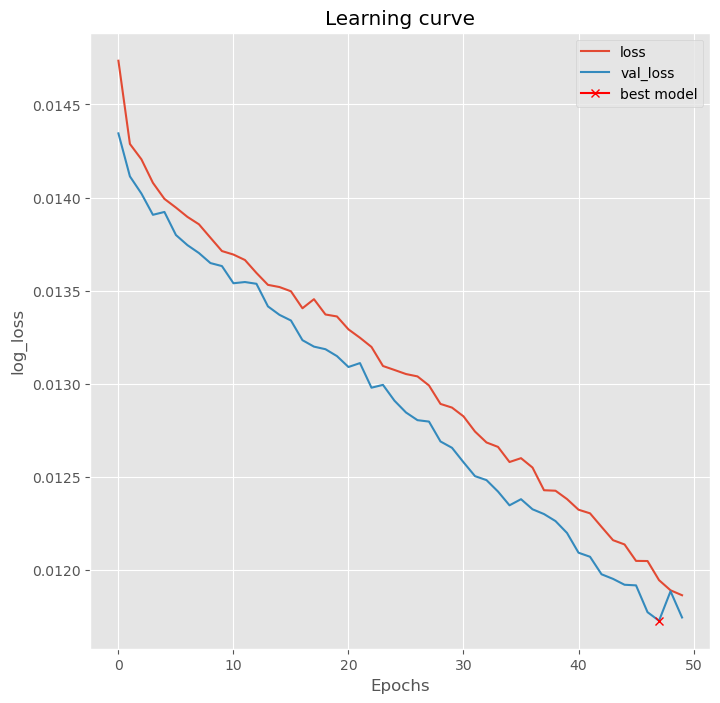

In [128]:
plt.figure(figsize=(8, 8))
plt.title("Learning curve")
plt.plot(results.history["loss"], label="loss")
plt.plot(results.history["val_loss"], label="val_loss")
plt.plot( np.argmin(results.history["val_loss"]), np.min(results.history["val_loss"]), marker="x", color="r", label="best model")
plt.xlabel("Epochs")
plt.ylabel("log_loss")
plt.legend();

In [76]:
model.load_weights('model-tgs-salt.h5')

In [77]:
# Evaluate on validation set (this must be equals to the best log_loss)
model.evaluate(X_valid, y_valid, verbose=1)

13/13 [==============================] - 3s 203ms/step - loss: 0.0118 - accuracy: 0.9950


[0.011842208914458752, 0.9949553608894348]

In [78]:
preds_train = model.predict(X_train, verbose=1)
preds_val = model.predict(X_valid, verbose=1)

13/13 [==============================] - 3s 220ms/step


In [79]:
X_validate = np.zeros((len(array_of_images_test), im_height, im_width, 1), dtype=np.float32)
# y_validate = np.zeros((len(array_of_roi), im_height, im_width, 1), dtype=np.float32)

In [80]:
for i in range(len(array_of_images_test)):
    x_img = resize(array_of_images[i], (256, 256, 1), mode='constant', preserve_range=True)
    X_validate[i] = (x_img)/255.0

In [81]:
preds_validate = model.predict(X_validate, verbose=1)

12/12 [==============================] - 2s 221ms/step


In [82]:
len(preds_validate)

378

In [83]:
full_mammo_images_paths_test[0]

'/Users/gryffindorgirl/Desktop/Internship/Kaggel_dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.245063149211255120613007755642780114172/full__pre__res.jpg'

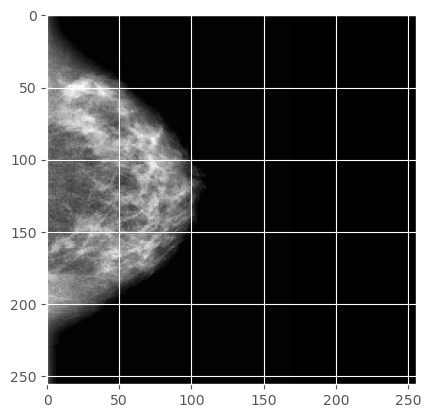

In [84]:
plt.imshow(array_of_images[898], cmap='gray')

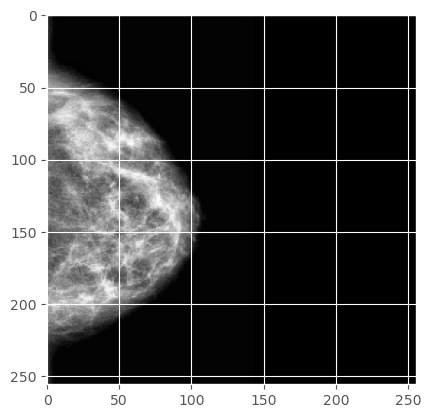

In [88]:
plt.imshow(X_validate[100], cmap='gray')

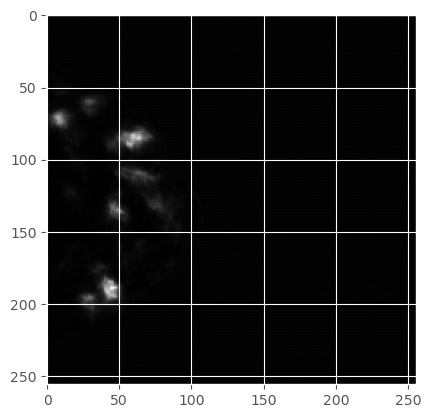

In [89]:
plt.imshow(preds_validate[100], cmap='gray')

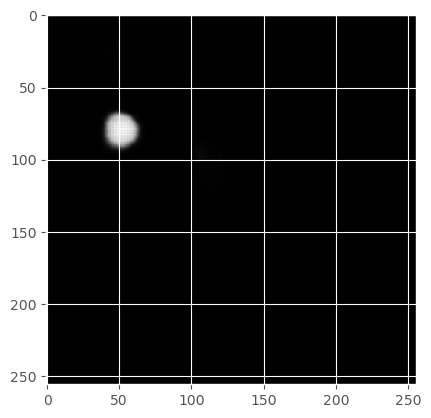

In [181]:
plt.imshow(preds_train[1900], cmap='gray')

In [ ]:
# preds_train = model.predict(X_train, verbose=1)
# preds_val = model.predict(X_valid, verbose=1)

In [ ]:
# model = unetVgg16.unetVgg16()
# unet = model.buildUnet(dropout_training=False)
# unet = model.compile_(model=unet)

# # Load pre-trained weights from desired checkpoint file.
# latest = tf.train.latest_checkpoint('model-tgs-salt.h5')
# print(latest)
# unet.load_weights(filepath=latest)

# # =========
# #  Predict
# # =========
# predicted_outputs = unet.predict(x=test_imgs, batch_size=len(test_imgs))

In [60]:
# input_img = Input((im_height, im_width, 1), name='img')
# unet = get_unet(dropout_training=False)
# unet.compile(model=unet)

# latest = tf.train.latest_checkpoint('model-tgs-salt.h5')
# print(latest)
# unet.load_weights(filepath=latest)

# predicted_outputs = unet.predict(x=array_of_images_test[0], batch_size=len(array_of_images_test[0]))

TypeError: get_unet() got an unexpected keyword argument 'dropout_training'

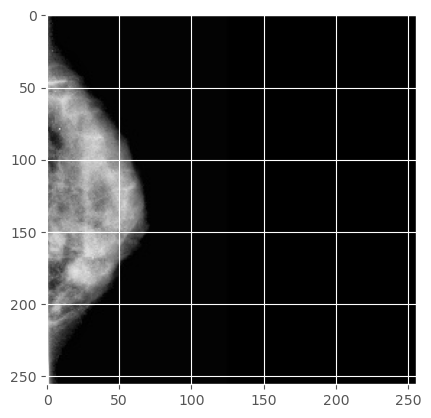

In [59]:
plt.imshow(array_of_images_test[0], cmap='gray')

In [51]:
# m1 = tf.keras.models.load_model('model-tgs-salt.h5')

In [45]:
# k = 5  # Number of folds
# kf = KFold(n_splits=k, shuffle=True, random_state=42)

# for fold, (train_index, val_index) in enumerate(kf.split(array_of_images)):
#     print(f"Training on Fold {fold + 1}")

#     # Create the U-Net model
# #     model = create_unet_model(input_shape=(height, width, num_channels), num_classes=num_classes)
#     input_img = Input((im_height, im_width, 1), name='img')
#     model = get_unet(input_img, n_filters=16, dropout=0.05, batchnorm=True)

#     # Compile the model with IoU as a metric and an appropriate loss and optimizer
# #     model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', iou_score])
# #     keras.utils.plot_model(model, to_file="./experimental_outputs/unet_model_v1.png", show_shapes=True,show_layer_names=True, dpi=300)
#     model.compile(optimizer=Adam(), loss="binary_crossentropy", metrics=["accuracy"])

#     # Split the data into training and validation sets for this fold
#     x_train, x_val = array_of_images[train_index], array_of_images[val_index]
#     y_train, y_val = array_of_roi[train_index], array_of_roi[val_index]

#     # Define the early stopping callback
#     callbacks = [
#     EarlyStopping(patience=10, verbose=1),
#     ReduceLROnPlateau(factor=0.1, patience=5, min_lr=0.00001, verbose=1),
#     ModelCheckpoint('model-tgs-salt.h5', verbose=1, save_best_only=True, save_weights_only=True)
#     ]
# #     early_stopping = EarlyStopping(monitor='val_iou_score', patience=3, mode='max', restore_best_weights=True)

#     # Train the model for this fold with early stopping
#     results = model.fit(x_train, y_train, batch_size=32, epochs=50, callbacks=callbacks,validation_data=(x_val, y_val))
# #     model.fit(x_train, y_train, batch_size=32, epochs=100,
# #               validation_data=(x_val, y_val), callbacks=[early_stopping])

#     # Evaluate the model on the test set or save the model weights for later use
#     # (This step is typically done outside the k-fold loop)


Training on Fold 1


TypeError: only integer scalar arrays can be converted to a scalar index

In [ ]:
# plt.figure(figsize=(8, 8))
# plt.title("Learning curve")
# plt.plot(results.history["loss"], label="loss")
# plt.plot(results.history["val_loss"], label="val_loss")
# plt.plot( np.argmin(results.history["val_loss"]), np.min(results.history["val_loss"]), marker="x", color="r", label="best model")
# plt.xlabel("Epochs")
# plt.ylabel("log_loss")
# plt.legend();

In [ ]:
# model.load_weights('model-tgs-salt.h5')

In [ ]:
# model.evaluate(X_valid, y_valid, verbose=1)